# Statistics for Data Science
  
<img src="../data/stats_intro.png"> </img>

Statistics can be a powerful tool when performing the art of **Data Science (DS)**. From a high-level view, statistics
is the use of mathematics to perform technical analysis of data. A basic visualization such as a bar chart might give you
some high-level information, but with statistics we get to operate on the data in a much more information-driven and
targeted way. The math involved helps us form concrete conclusions about our data rather than just guesstimating. Using
statistics, we can gain deeper and more fine grained insights into how exactly our data is structured and based on that
structure how we can optimally apply other data science techniques to get even more information.

It includes **descriptive statistics** (the study of methods and tools for collecting data, and mathematical models to describe and interpret data) and **inferential statistics** (the systems and techniques for making probability-based decisions and accurate predictions based on incomplete (sample) data).

## Linear Algebra

Linear algebra is a field of mathematics that is universally agreed to be a prerequisite to a deeper understanding of machine learning. Although linear algebra is a large field with many esoteric theories and findings, the nuts and bolts tools and notations taken from the field are practical for machine learning practitioners.

A **scalar** is a number. Examples of scalars are temperature, distance, speed or mass - all quantities that have a magnitude but no "direction", other than positive or negative.

In [3]:
# Import libraries
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

from plot_helper import *

### Vector

A vector is a list of numbers. There are (at least) two ways to interpret what this list of numbers mean: One way to think aof the vector as being a point in space. Then this list of numbers is a way of identifying that point in space, where each number represents the vector's component that dimension. Another way to think of a vector is a magnitude and direction, e.g. velocity. 

An example of a vector is $\hat{a} = \left[ 4, 3\right]$. You can visualize a vector as follows. Use the `plot_vector()` utility function to plot the a vector graphically.

In [ ]:
vectors = [(2,2)]
tails = [(-3,-2), (-3,1), (0,0), (1,-3)]
plot_vector(vectors, tails)


**Iris Dataset:**  
Fisher RA. The use of multiple measurements in taxonomic problems. *Annals of Eugenics* 1936; 7 (2): 179–188

https://github.com/neurospin/pystatsml/tree/master/datasets/iris.csv

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline
sns.set()

### Loading the dataset

In [54]:
data_file = './inputs/iris.csv'
dataset = pd.read_csv(data_file, sep=',') # Can use lists for possible missing values
dataset.shape

(150, 5)

In [55]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [56]:
dataset.head(n=10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Exploratory analysis

In [57]:
dataset.describe(percentiles=[.25, .5, .75], include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [58]:
grouped_iris = dataset.groupby('species')
grouped_iris.mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


#### Exercise  
Create a table that describes the grouped_iris data frame, including the 25th, 50th, and 75th percentiles

In [59]:
grouped_iris.describe(percentiles=[.25, .5, .75], include='all')

petal_length                                               \
                  count   mean       std  min  25%   50%    75%  max   
species                                                                
setosa             50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9   
versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal_width        ...  sepal_length      sepal_width         \
                 count   mean ...           75%  max       count   mean   
species                       ...                                         
setosa            50.0  0.246 ...           5.2  5.8        50.0  3.428   
versicolor        50.0  1.326 ...           6.3  7.0        50.0  2.770   
virginica         50.0  2.026 ...           6.9  7.9        50.0  2.974   

                                                   
                 std  min    25%  50%    75%  max  
species                                            
setosa      0.379064  2.3  3.200  3.4  3.675  4.4  
versicolor  0.313798  2.0  2.525  2.8  3.000  3.4  
virginica   0.322497  2.2  2.800  3.0  3.175  3.8  

[3 rows x 32 columns]

species
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: petal_width, dtype: object

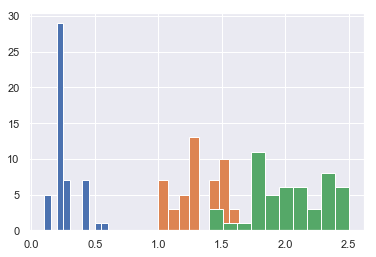

In [60]:
grouped_iris['petal_width'].hist()

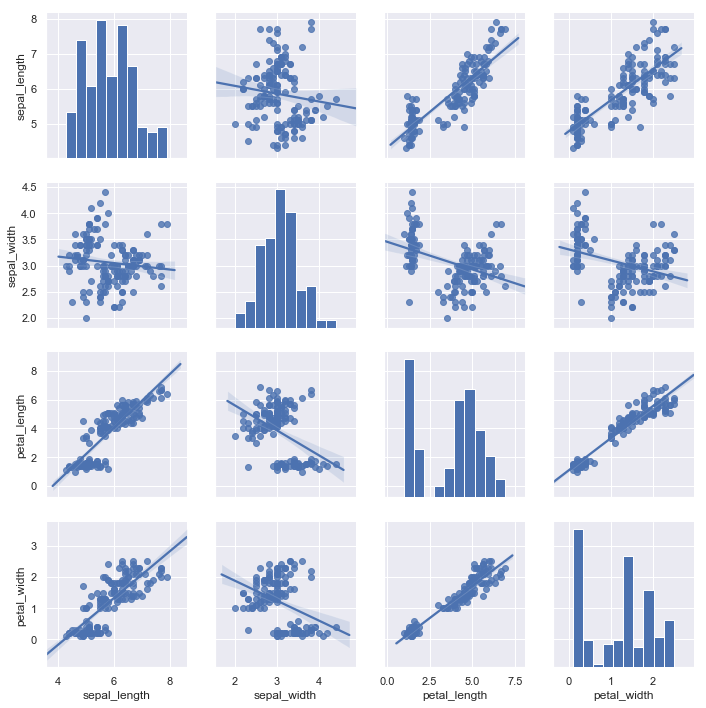

In [61]:
sns.pairplot(dataset, kind='reg')

### Data Extraction
For the statistical functions we will have to specify the dependent data variable and the independent data variable as two separate arrays

In [62]:
grouped_iris['species'] # .groupby function returns a GroupBy object that is lazily executed

In [63]:
dataset[dataset['species']=='setosa'].head(n=10) # Better to use the original dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### Exercise  
How would you make separate variables containing the petal and sepal characteristics of each iris type?

In [64]:
dataset[dataset['species']=='setosa']['petal_length'].head(n=10)

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
5    1.7
6    1.4
7    1.5
8    1.4
9    1.5
Name: petal_length, dtype: float64

In [65]:
pl_setosa = dataset[dataset['species']=='setosa']['petal_length']
pl_virginica = dataset[dataset['species']=='virginica']['petal_length']
pl_versicolor = dataset[dataset['species']=='versicolor']['petal_length']

pw_setosa = dataset[dataset['species']=='setosa']['petal_width']
pw_virginica = dataset[dataset['species']=='virginica']['petal_width']
pw_versicolor = dataset[dataset['species']=='versicolor']['petal_width']

sl_setosa = dataset[dataset['species']=='setosa']['sepal_length']
sl_virginica = dataset[dataset['species']=='virginica']['sepal_length']
sl_versicolor = dataset[dataset['species']=='versicolor']['sepal_length']

sw_setosa = dataset[dataset['species']=='setosa']['sepal_width']
sw_virginica = dataset[dataset['species']=='virginica']['sepal_width']
sw_versicolor = dataset[dataset['species']=='versicolor']['sepal_width']

In [66]:
type(sw_setosa)

pandas.core.series.Series

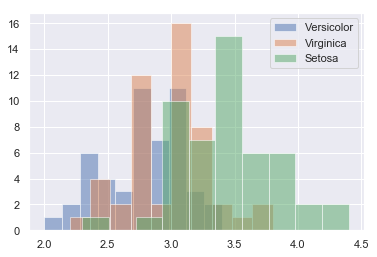

In [67]:
plt.hist(sw_versicolor, label='Versicolor', alpha=0.5)
plt.hist(sw_virginica, label='Virginica', alpha=0.5)
plt.hist(sw_setosa, label='Setosa', alpha=0.5)
plt.legend(loc='best')

### Comparing 2 samples of a continuous measure: Parametric tests   
*t*-tests

In [68]:
# t-test of 2 independent samples
ttest_sw_set_ver = stats.ttest_ind(sw_setosa, sw_versicolor, equal_var=True, nan_policy='omit') # equal_var default: T
print(ttest_sw_set_ver)

Ttest_indResult(statistic=9.454975848128596, pvalue=1.8452599454769322e-15)


In [69]:
# t-test of paired samples
ttest_width_setosa = stats.ttest_rel(pw_setosa, sw_setosa, nan_policy='omit')
print(ttest_width_setosa)

Ttest_relResult(statistic=-60.967252469790076, pvalue=7.212365087348317e-48)


In [70]:
# t-test from descriptive statistics: mean, SD, n from each sample
ttest_pw_vir_ver = stats.ttest_ind_from_stats(20.06, 2.902, 50, 13.26, 1.977, 50, equal_var=False)
print(ttest_pw_vir_ver)

Ttest_indResult(statistic=13.6933602626047, pvalue=2.3071043100383677e-23)


Pearson's correlation coefficient can also be used as a measure of effect size (see below)

In [71]:
1-stats.norm.cdf(ttest_pw_vir_ver[0]) # one-side p-value if I know the test value

0.0

In [72]:
stats.norm.ppf(ttest_pw_vir_ver[1]) # What is the test value given the p-value

-9.889697326376915

### Comparing 2 samples of a continuous measure: Non-Parametric tests 
Wilcoxon rank-sum  
Mann-Whitney U  
Wilcoxon

In [73]:
# Wilcoxon rank-sum test: Can use if n < 20
wrk_sw_set_ver = stats.ranksums(sw_setosa, sw_versicolor)
print(wrk_sw_set_ver)

RanksumsResult(statistic=7.321236707735454, pvalue=2.4569600276217444e-13)


In [74]:
# Mann-Whitney U test: More robust than Wilcoxon rank-sum, use if n > 20
mwu_sw_set_ver = stats.mannwhitneyu(sw_setosa, sw_versicolor, use_continuity=True, alternative='greater')
                                    # alternative options: 'less', 'two-sided'. 'None' is deprecated
print(mwu_sw_set_ver)

MannwhitneyuResult(statistic=2312.0, pvalue=1.0716898640387601e-13)


In [75]:
# Wilcoxon test: For paired samples
wilcoxon_width_setosa = stats.wilcoxon(pw_setosa, sw_setosa, zero_method='wilcox', correction=False)
                        # zero_method is how zero-differences are handled. Options: 'pratt', 'zsplit'
                        # correction is if statistic is corrected towards the mean during calculation. Default: F
print(wilcoxon_width_setosa)

WilcoxonResult(statistic=0.0, pvalue=7.172970695345464e-10)


**Comparing multiple groups**  
ANOVA  
Kruskal-Wallis H

In [76]:
# 1-way ANOVA: Parametric
anova_sw = stats.f_oneway(sw_setosa, sw_versicolor, sw_virginica)
print(anova_sw)

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)


In [77]:
# Kruskal-Wallis H test: Non-parametric
kw_sw = stats.kruskal(sw_setosa, sw_versicolor, sw_virginica, nan_policy='omit')
print(kw_sw)

KruskalResult(statistic=63.571146104163795, pvalue=1.5692820940316782e-14)


### Contingency Tables   
Chi square  
Fisher's exact test

**pd.crosstab(vector1, vector2)** creates a contingency table from two binary vectors

#### Exercise  
Create a contingency table from counts of big and small petal width and sepal width using the mean as cutoff

In [78]:
mean_pw = dataset['Petal_Width'].mean()
mean_sw = dataset['Sepal_Width'].mean()

width_table = pd.crosstab(dataset.Petal_Width > mean_pw, dataset.Sepal_Width > mean_sw)
width_table

KeyError: 'Petal_Width'

In [ ]:
# Chi square: Requires a matrix composed of individual arrays or a pd.crosstab result as input 
chi2_width = stats.chi2_contingency(width_table, correction=False) # Correction: Yates'
                                     # Another optional argument: lambda_='pearson'/'log-likelihood'/'freeman-tukey'/
                                     # 'mod-log-likelihood'/'neyman'/'cressie-read'
                                     # lambda_ default is None which computes Pearson's chi2
print(chi2_width)
print('\n')
print(' Chi-square value: ', chi2_width[0], '\n',
      'p-value: ', chi2_width[1], '\n',
      'Degrees of freedom: ', chi2_width[2], '\n',
      'Expected frequencies: ', chi2_width[3], '\n')

In [ ]:
# Fisher's exact test: Use if any expected frequency is < 5
fisher_width = stats.fisher_exact([[18,42],
                                   [65,25]], alternative='two-sided') # alternative options: 'less', 'greater'
print(fisher_width)
print('\n')
print(' Odds ratio: ', fisher_width[0], '\n',
      'p-value: ', fisher_width[1])

### Correlation  
Pearson's correlation coefficient *r*  

In [ ]:
# Pearson correlation coefficient: Parametric
pearson_petal = stats.pearsonr(dataset['petal_width'], dataset['petal_length'])
print(pearson_petal,'\n')
print('Pearson\'s correlation coefficient: ', pearson_petal[0])
print('p-value: ', pearson_petal[1]) # p-value is not so useful or reliable

### Linear Regression

In [ ]:
# Scatterplot of variables to include in regression
sns.lmplot(y='petal_width', x='sepal_width', data=dataset) # Add hue='Type' to observe subgroups

In [ ]:
# Scipy linear regression using least-squares. Only works for univariate
scipy_linreg_width = stats.linregress(dataset['sepal_width'], dataset['petal_width']) # order of x,y != from lmplot
print(scipy_linreg_width)